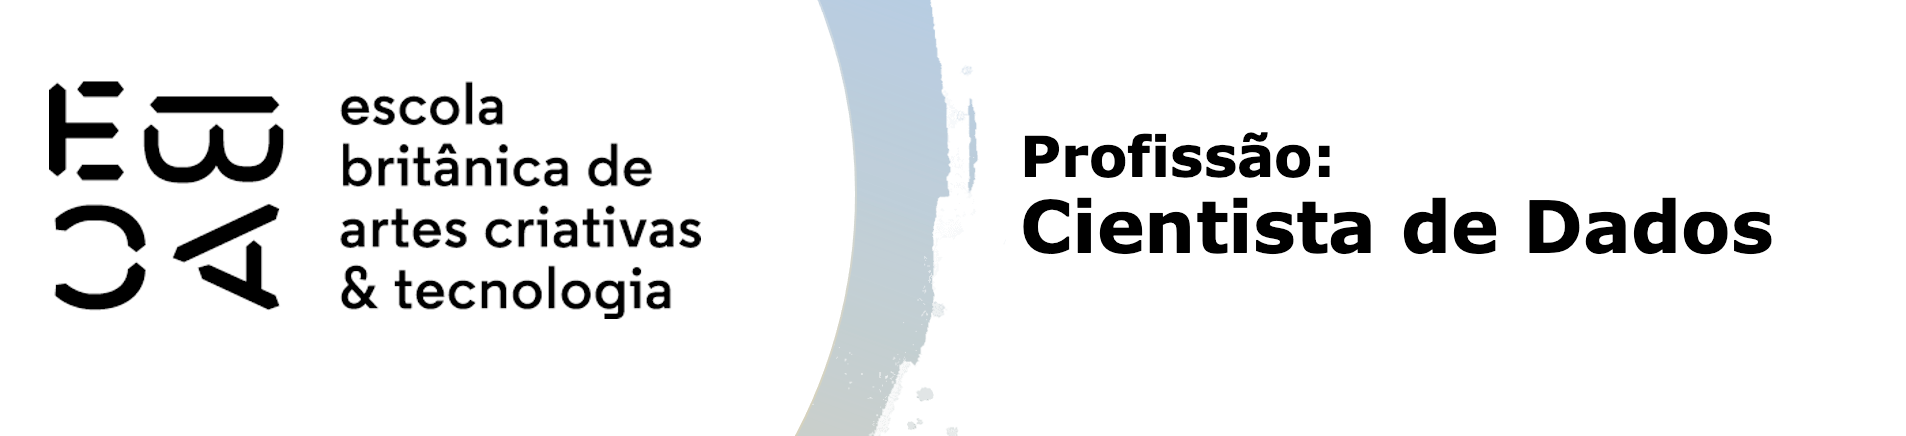

# Tarefa

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

In [3]:
# Filtro do df por data a partir de janeiro de 2020.
df1 = df[df['Data Emissão'] > '2020-01-01'].copy()

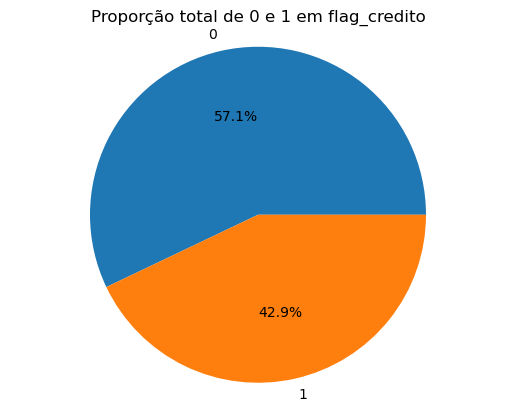

In [4]:
#plot da proporção de notas que tiveram retorno>0 versus as que tiveram retorno<0.

# Contagem dos valores na coluna 'flag_credito'
contagem = df1['flag_credito'].value_counts()

# Plotando um polemico gráfico de pizza com a proporção
plt.pie(contagem, labels=contagem.index, autopct='%1.1f%%')
plt.title('Proporção total de 0 e 1 em flag_credito')
plt.axis('equal')
plt.show()

In [5]:
tab = pd.crosstab(df1.categoria,
                  df1.flag_credito,
                  margins=True,
                  margins_name='total')
# coluna com a proporção de notas que tiveram retorno>0 versus as que tiveram retorno<0 por categoria.

rótulo_evento = tab.columns[0]
rótulo_nao_evento = tab.columns[1]

tab['pct_evento'] = tab[rótulo_evento] / tab.loc['total', rótulo_evento]
tab['pct_nao_evento'] = tab[rótulo_nao_evento] / tab.loc['total',
                                                         rótulo_nao_evento]

tab

flag_credito,0,1,total,pct_evento,pct_nao_evento
categoria,,,,,
Alimentos,1605,3439,5044,0.032345,0.092171
Auto posto,403,135,538,0.008122,0.003618
Construção,8523,7522,16045,0.171762,0.201603
Farmácia,6601,3582,10183,0.133028,0.096004
Mercado,14378,13176,27554,0.289756,0.353140
Restaurantes,552,1625,2177,0.011124,0.043553
Varejo,4365,701,5066,0.087967,0.018788
Vestuário,1477,443,1920,0.029766,0.011873
não definido,11717,6688,18405,0.236130,0.179250


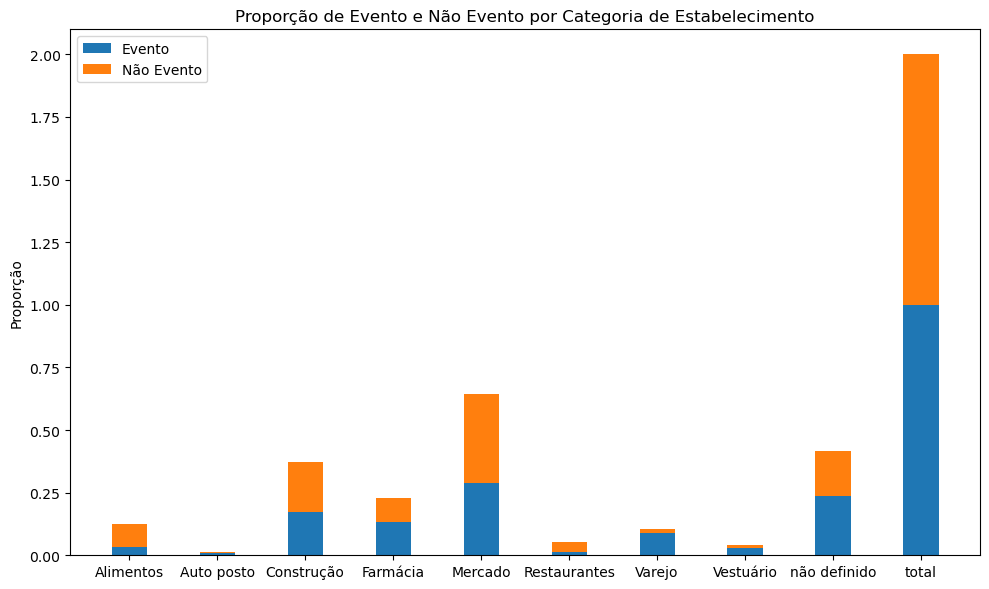

In [16]:
#plot da proporção de notas que tiveram retorno>0 versus as que tiveram retorno<0 por categoria.

fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(tab))
width = 0.4

ax.bar(tab.index, tab['pct_evento'], width, label='Evento')
ax.bar(tab.index,
       tab['pct_nao_evento'],
       width,
       bottom=tab['pct_evento'],
       label='Não Evento')

ax.set_ylabel('Proporção')
ax.set_title(
    'Proporção de Evento e Não Evento por Categoria de Estabelecimento')
ax.legend()

plt.tight_layout()
plt.show()

## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

In [7]:
tab['odds'] = tab[1] / tab[0]
tab['odds_ratio'] = tab['odds'] / tab.loc['total', 'odds']

tab['logit'] = np.log(tab.odds)
tab['woe'] = np.log(tab.odds_ratio)
tab

flag_credito,0,1,total,pct_evento,pct_nao_evento,odds,odds_ratio,logit,woe
categoria,,,,,,,,,
Alimentos,1605,3439,5044,0.032345,0.092171,2.142679,2.849612,0.762057,1.047183
Auto posto,403,135,538,0.008122,0.003618,0.334988,0.445510,-1.093662,-0.808536
Construção,8523,7522,16045,0.171762,0.201603,0.882553,1.173733,-0.124936,0.160190
Farmácia,6601,3582,10183,0.133028,0.096004,0.542645,0.721680,-0.611300,-0.326174
Mercado,14378,13176,27554,0.289756,0.353140,0.916400,1.218747,-0.087302,0.197824
Restaurantes,552,1625,2177,0.011124,0.043553,2.943841,3.915100,1.079715,1.364841
Varejo,4365,701,5066,0.087967,0.018788,0.160596,0.213581,-1.828866,-1.543740
Vestuário,1477,443,1920,0.029766,0.011873,0.299932,0.398889,-1.204199,-0.919073
não definido,11717,6688,18405,0.236130,0.179250,0.570795,0.759117,-0.560726,-0.275600


Text(0.5, 1.0, 'WOE por Categoria de Estabelecimento')

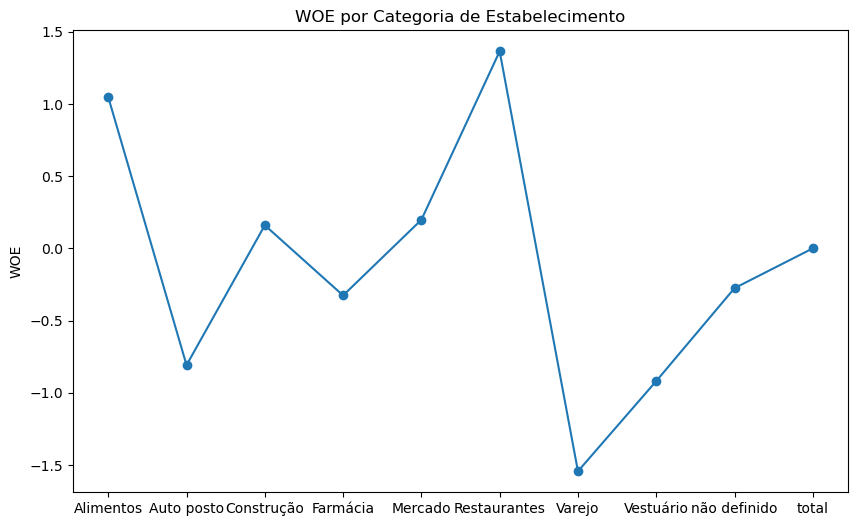

In [8]:
#plot do woe por categoria
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(tab))
width = 0.4

ax.plot(tab.index, tab['woe'], marker='o')
ax.set_ylabel('WOE')
ax.set_title('WOE por Categoria de Estabelecimento')

## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [9]:
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento] / tab.loc['total', rótulo_evento]
    tab['pct_nao_evento'] = tab[rótulo_nao_evento] / tab.loc['total',
                                                             rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento / tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento) * tab.woe
    return tab['iv_parcial'].sum()


iv = IV(df1.categoria, df1.flag_credito)
iv

0.27885955236195403

In [12]:
#definindo os metadados
df1.drop(
    columns=['CNPJ emit.', 'Emitente', 'No.', 'Data Emissão', 'Data Registro'],
    inplace=True)

In [13]:
metadados = pd.DataFrame({'dtype': df1.dtypes})
metadados

,dtype
Valor NF,float64
Créditos,float64
Situação do Crédito,category
Ano,int64
Semestre,int64
Retorno,float64
flag_credito,int64
categoria,object


In [14]:
metadados['papel'] = 'covariavel'

metadados.loc['flag_credito', 'papel'] = 'resposta'
metadados['nunique'] = df1.nunique()
metadados

,dtype,papel,nunique
Valor NF,float64,covariavel,28381
Créditos,float64,covariavel,7842
Situação do Crédito,category,covariavel,2
Ano,int64,covariavel,2
Semestre,int64,covariavel,2
Retorno,float64,covariavel,35832
flag_credito,int64,resposta,2
categoria,object,covariavel,9


In [15]:
for var in metadados[metadados.papel == 'covariavel'].index:
    if (metadados.loc[var, 'nunique'] > 10):
        metadados.loc[var, 'IV'] = IV(pd.qcut(df1[var], 10, duplicates='drop'),
                                      df1.flag_credito)
    else:
        metadados.loc[var, 'IV'] = IV(df1[var], df1.flag_credito)

metadados

C:\Users\sann_\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sann_\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,dtype,papel,nunique,IV
Valor NF,float64,covariavel,28381,0.059165
Créditos,float64,covariavel,7842,inf
Situação do Crédito,category,covariavel,2,0.000027
Ano,int64,covariavel,2,0.003179
Semestre,int64,covariavel,2,0.004921
Retorno,float64,covariavel,35832,inf
flag_credito,int64,resposta,2,NaN
categoria,object,covariavel,9,0.278860


## Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


A variável com mais influência na nossa variável resposta é a categoria de estabelecimento, pois alguns itens adquiridos na compra que gerou a nota fiscal impedem a doação do retorno como:

- Medicamentos sujeitos à vigilância sanitária: produtos farmacêuticos que requerem controle especial, como medicamentos controlados.
- Armas e munições: itens relacionados à defesa pessoal e à segurança pública.
- Combustíveis e lubrificantes: gasolina, diesel, etanol, óleo lubrificante, entre outros.
- Fumo e seus derivados: cigarros, charutos, cigarrilhas, fumo para cachimbo, entre outros.
- Veículos automotores: carros, motocicletas, caminhões, ônibus, entre outros.
- Portanto, independentemente das demais variáveis, a nota fiscal que contém esses itens gera uma nota fiscal que não produz nenhum retorno.

Os estabelecimentos que mais geraram retornos foram:

<font color='red'>Restaurantes, seguido de alimentos.</font>